# 0. 课程大纲

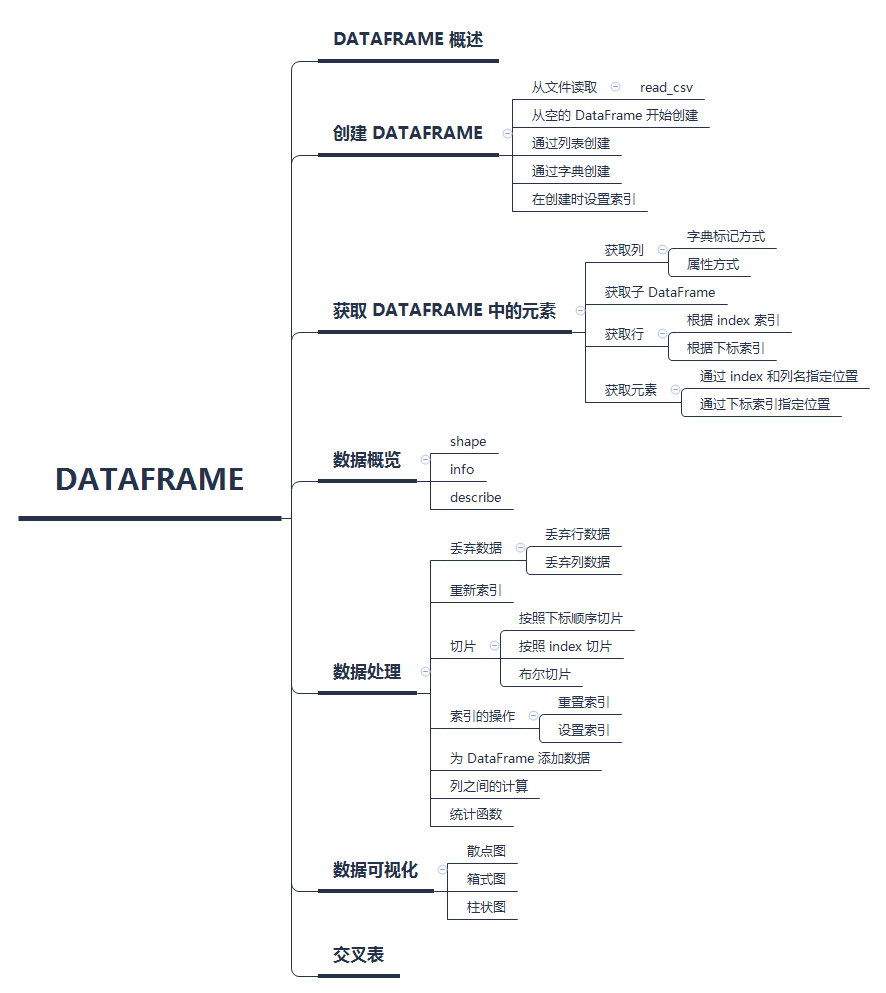

# 1. DataFrame 概述
- DataFrame 用于存贮表格数据
- DataFrame 的每一列、每一行都是一个 Series
- DataFrame 有一个 index 列
- DataFrame 与二维数组的异同：
    - 相同点：
        - 都是表格类型的数据
    - 不同点：
        - DataFrame 有 index
        - DataFrame 中的数据可以具有不同的类型
        - DateFrame 支持更多数据操作

In [2]:
import pandas as pd
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. 创建 DataFrame

## 2.1 从文件中读取
**`read_csv(filepath, header='infer', index_col=None, skiprows=None, skipfooter=0, encoding=None) `**
- 默认将文件的第一行作为表格的标题，如果表格没有包含标题，则通过 `header=None` 进行设置
- 读取含有中文的文件，设置 `encoding='gbk'`

In [4]:
# 读取 price_000300.csv 中的数据
df = pd.read_csv('price_000300.csv',header=None)
df.head()

,0,1
0,20050104,982.794
1,20050105,992.564
2,20050106,983.174
3,20050107,983.958
4,20050110,993.879


>**随堂练习：**在以上 `read_csv` 语句中，如果不设置 `header=None` 会得到什么结果？

## 2.2 从空的 DataFrame 开始创建
- 先创建一个空的 DataFrame
- 再逐一填入每一列的数据

In [5]:
df = pd.DataFrame()
df

""


In [6]:
df['name'] = ['贵州茅台','洋河股份','泸州老窖','五粮液']
df['price'] = [547.92,93.08,40.1,50.75]
df['pe'] = [21.64,15.01,16.04,15.63]
df

,name,price,pe
0,贵州茅台,547.92,21.64
1,洋河股份,93.08,15.01
2,泸州老窖,40.10,16.04
3,五粮液,50.75,15.63


## 2.3 通过列表创建
- 通过二维列表创建
- 二维列表中每一个子列表对应 DataFrame 的一行

In [7]:
df = pd.DataFrame([['贵州茅台',547.92,21.64],['洋河股份',93.08,15.01],['泸州老窖',40.10,16.04],['五粮液',50.75,15.63]])
df

,0,1,2
0,贵州茅台,547.92,21.64
1,洋河股份,93.08,15.01
2,泸州老窖,40.10,16.04
3,五粮液,50.75,15.63


In [8]:
# 在创建时指定 columns 的名称
df = pd.DataFrame([['贵州茅台',547.92,21.64],['洋河股份',93.08,15.01],['泸州老窖',40.10,16.04],['五粮液',50.75,15.63]],columns = ['name','price','pe'])
df

,name,price,pe
0,贵州茅台,547.92,21.64
1,洋河股份,93.08,15.01
2,泸州老窖,40.10,16.04
3,五粮液,50.75,15.63


## 2.4 通过字典创建
- 字典的 `key` 为列名，`value` 为列中的数据

In [69]:
df = pd.DataFrame({'name':['贵州茅台','洋河股份','泸州老窖','五粮液'],'price':[547.92,93.08,40.1,50.75],'pe':[21.64,15.01,16.04,15.63]})
df

,name,price,pe
0,贵州茅台,547.92,21.64
1,洋河股份,93.08,15.01
2,泸州老窖,40.10,16.04
3,五粮液,50.75,15.63


## 2.5 在创建时设置索引

In [11]:
df = pd.DataFrame({'name':['贵州茅台','洋河股份','泸州老窖','五粮液'],'price':[547.92,93.08,40.1,50.75],'pe':[21.64,15.01,16.04,15.63]},index = ['Stock1','Stock2','Stock3','Stock4'])
df

,name,price,pe
Stock1,贵州茅台,547.92,21.64
Stock2,洋河股份,93.08,15.01
Stock3,泸州老窖,40.10,16.04
Stock4,五粮液,50.75,15.63


# 3. 获取 DataFrame 中的元素

## 3.1 获取列

### 3.1.1 字典标记方式

In [14]:
df = pd.read_csv('stocks.csv',index_col='id',encoding='gbk')
#=-----------------------------------------------------
df['name']

id
Stock1    贵州茅台
Stock2    洋河股份
Stock3    泸州老窖
Stock4     五粮液
Name: name, dtype: object

### 3.1.2 属性方式

In [15]:
df = pd.read_csv('stocks.csv',index_col='id',encoding='gbk')
#=-----------------------------------------------------
df.name   # 可以正常运行，但容易引起错误（name为保留字）

id
Stock1    贵州茅台
Stock2    洋河股份
Stock3    泸州老窖
Stock4     五粮液
Name: name, dtype: object

- 注意：属性方式不能使用保留字，列名有可能与保留字重复

>**随堂练习：**查看返回数据的数据类型

## 3.2 获取子 DataFrame

In [38]:
dff = df[['name','pe']]
dff

,name,pe
Stock1,贵州茅台,33.10
Stock2,洋河股份,23.76
Stock3,泸州老窖,25.32
Stock4,五粮液,20.00


>**随堂练习：**`df['name']` 和 `df[['name']]` 有什么区别？

## 3.3 获取行

### 3.3.1 根据 index 索引
- `df.loc[index]`

In [16]:
df = pd.read_csv('stocks.csv',index_col='id',encoding='gbk')
#=-----------------------------------------------------
df.loc['Stock1']

name       贵州茅台
price    547.92
pe        21.64
Name: Stock1, dtype: object

### 3.3.2 根据下标索引
- `df.iloc[i]`

In [17]:
df = pd.read_csv('stocks.csv',index_col='id',encoding='gbk')
#=-----------------------------------------------------
df.iloc[1]

name      洋河股份
price    93.08
pe       15.01
Name: Stock2, dtype: object

>**随堂练习：**查看返回数据的数据类型

## 3.4 获取元素

### 3.4.1 通过 index 和列名指定位置
- `df.at[index,column]`

In [18]:
df = pd.read_csv('stocks.csv',index_col='id',encoding='gbk')
#=-----------------------------------------------------
df.loc['Stock1']

name       贵州茅台
price    547.92
pe        21.64
Name: Stock1, dtype: object

### 3.4.2 通过下标索引指定位置
- `df.iat[i,j]`

In [19]:
df = pd.read_csv('stocks.csv',index_col='id',encoding='gbk')
#=-----------------------------------------------------
df.loc['Stock1']

name       贵州茅台
price    547.92
pe        21.64
Name: Stock1, dtype: object

# 4. 数据概览  

|No.|属性/方法|含义|
|:---:|:---|:---:|
|1| shape |获得 DataFrame 的结构|
|2| info() |打印 DataFrame 中数据的存贮信息|
|3| describe() |返回 DataFrame 中数据的统计信息|

In [33]:
# shape, info(), describe()
df = pd.read_csv('stocks.csv',index_col='id',encoding='gbk')
#=-----------------------------------------------------
print(df)
print('\n')
print('\ndf.shape:\n',df.shape)
print('\n\ndf.info:\n')
df.info()
print('\n\ndf.describe:\n',df.describe())

        name   price     pe
id                         
Stock1  贵州茅台  547.92  21.64
Stock2  洋河股份   93.08  15.01
Stock3  泸州老窖   40.10  16.04
Stock4   五粮液   50.75  15.63



df.shape:
 (4, 3)


df.info:

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stock1 to Stock4
Data columns (total 3 columns):
name     4 non-null object
price    4 non-null float64
pe       4 non-null float64
dtypes: float64(2), object(1)
memory usage: 128.0+ bytes


df.describe:
             price         pe
count    4.000000   4.000000
mean   182.962500  17.080000
std    244.378586   3.069343
min     40.100000  15.010000
25%     48.087500  15.475000
50%     71.915000  15.835000
75%    206.790000  17.440000
max    547.920000  21.640000


- describe 仅统计数值数据

>**随堂练习：**  
- 查看 Titanic 数据的结构。样本量是多少，一共有多少个特征？
- 查看 Titanic 的 info，哪些特征有缺失数据？
- 查看 Titanic 上乘客的平均年龄、最大年龄、最小年龄
- 查看 Titanic 船票价格的平均值、中位数
- Titanic 上乘客的幸存比例是多少？

# 5. 数据处理

## 5.1 丢弃数据

In [34]:
df = pd.read_csv('stocks.csv',index_col='id',encoding='gbk')
#=-----------------------------------------------------
df

,name,price,pe
id,,,
Stock1,贵州茅台,547.92,21.64
Stock2,洋河股份,93.08,15.01
Stock3,泸州老窖,40.10,16.04
Stock4,五粮液,50.75,15.63


### 5.1.1 丢弃行数据

In [71]:
df.drop('Stock1')

,name,price,pe
Stock2,洋河股份,93.08,23.76
Stock3,泸州老窖,40.10,25.32
Stock4,五粮液,50.75,20.00


In [72]:
df.drop(['Stock1','Stock2'])

,name,price,pe
Stock3,泸州老窖,40.10,25.32
Stock4,五粮液,50.75,20.00


### 5.1.2 丢弃列数据

In [119]:
df.drop('price',axis=1)

,name,pe
Stock2,洋河股份,23.76
Stock3,泸州老窖,25.32
Stock4,五粮液,20.00
Stock1,贵州茅台,33.10


>**随堂练习: **
- 丢弃 Titanic 数据中的 PassengerId
- 使用 iloc 可以达到这一目的吗？

## 5.2 重新索引

In [35]:
df = pd.read_csv('stocks.csv',index_col='id',encoding='gbk')
#=-----------------------------------------------------
df

,name,price,pe
id,,,
Stock1,贵州茅台,547.92,21.64
Stock2,洋河股份,93.08,15.01
Stock3,泸州老窖,40.10,16.04
Stock4,五粮液,50.75,15.63


In [36]:
# 改变行的顺序
df.reindex(['Stock2','Stock3','Stock4','Stock1'])

,name,price,pe
id,,,
Stock2,洋河股份,93.08,15.01
Stock3,泸州老窖,40.10,16.04
Stock4,五粮液,50.75,15.63
Stock1,贵州茅台,547.92,21.64


In [37]:
# 改变列的顺序
df.reindex(columns=['pe','price','name'])

,pe,price,name
id,,,
Stock1,21.64,547.92,贵州茅台
Stock2,15.01,93.08,洋河股份
Stock3,16.04,40.10,泸州老窖
Stock4,15.63,50.75,五粮液


## 5.3 切片

In [40]:
df = pd.read_csv('stocks.csv',index_col='id',encoding='gbk')
#=-----------------------------------------------------
df

,name,price,pe
id,,,
Stock1,贵州茅台,547.92,21.64
Stock2,洋河股份,93.08,15.01
Stock3,泸州老窖,40.10,16.04
Stock4,五粮液,50.75,15.63


### 5.3.1 按照下标顺序切片

In [41]:
df.iloc[0:2,:]

,name,price,pe
id,,,
Stock1,贵州茅台,547.92,21.64
Stock2,洋河股份,93.08,15.01


### 5.3.2 按照 index 切片

In [43]:
df.loc['Stock1':'Stock3']

,name,price,pe
id,,,
Stock1,贵州茅台,547.92,21.64
Stock2,洋河股份,93.08,15.01
Stock3,泸州老窖,40.10,16.04


>**随堂练习：**按照整数切片和按照 index 切片有何不同？

### 5.3.3 布尔切片

In [45]:
# 选取 PE 小于 20 的股票
df[df.pe < 20]

,name,price,pe
id,,,
Stock2,洋河股份,93.08,15.01
Stock3,泸州老窖,40.10,16.04
Stock4,五粮液,50.75,15.63


>**随堂练习：**在 Titanic 的乘客中，Pclass=1\2\3 的乘客的幸存率分别为多少？

## 5.4 索引的操作

### 5.4.1 重置索引

In [47]:
df = pd.read_csv('stocks.csv',index_col='id',encoding='gbk')
#=-----------------------------------------------------
df

,name,price,pe
id,,,
Stock1,贵州茅台,547.92,21.64
Stock2,洋河股份,93.08,15.01
Stock3,泸州老窖,40.10,16.04
Stock4,五粮液,50.75,15.63


In [49]:
# 重置索引
df.reset_index()

,id,name,price,pe
0,Stock1,贵州茅台,547.92,21.64
1,Stock2,洋河股份,93.08,15.01
2,Stock3,泸州老窖,40.10,16.04
3,Stock4,五粮液,50.75,15.63


- `reset_index` 不改变原来的 DataFrame

### 5.4.2 设置索引

In [52]:
df.set_index('name')

,price,pe
name,,
贵州茅台,547.92,21.64
洋河股份,93.08,15.01
泸州老窖,40.10,16.04
五粮液,50.75,15.63


- `set_index` 会覆盖原所索引，`set_index` 同样不改变原来的 DataFrame

## 5.5 为 DataFrame 添加数据

In [58]:
df = pd.read_csv('stocks.csv',index_col='id',encoding='gbk')
#=-----------------------------------------------------
df

,name,price,pe
id,,,
Stock1,贵州茅台,547.92,21.64
Stock2,洋河股份,93.08,15.01
Stock3,泸州老窖,40.10,16.04
Stock4,五粮液,50.75,15.63


In [60]:
s = pd.Series([6.97,3.32,3.63,4.32],index=['Stock1','Stock4','Stock3','Stock2'])
df['pb'] = s
df

,name,price,pe,pb
id,,,,
Stock1,贵州茅台,547.92,21.64,6.97
Stock2,洋河股份,93.08,15.01,4.32
Stock3,泸州老窖,40.10,16.04,3.63
Stock4,五粮液,50.75,15.63,3.32


**也可以直接为列指定 list 或者 array 这样的无 index 数据**

In [63]:
df['market_share'] = [1,2,3,4]
df

,name,price,pe,pb,market_share
id,,,,,
Stock1,贵州茅台,547.92,21.64,6.97,1
Stock2,洋河股份,93.08,15.01,4.32,2
Stock3,泸州老窖,40.10,16.04,3.63,3
Stock4,五粮液,50.75,15.63,3.32,4


**常见错误：**使用 list 或者 array 为 DataFrame 添加数据有可能产生错误的匹配

## 5.5 列之间的计算

In [65]:
# 根据 price 和 pe 计算 eps
df = pd.read_csv('stocks.csv',index_col='id',encoding='gbk')
#=-----------------------------------------------------
df['eps'] = df.price / df.pe
df

,name,price,pe,eps
id,,,,
Stock1,贵州茅台,547.92,21.64,25.319778
Stock2,洋河股份,93.08,15.01,6.201199
Stock3,泸州老窖,40.10,16.04,2.500000
Stock4,五粮液,50.75,15.63,3.246961


>**随堂练习：**计算 Titanic 乘客中家庭成员数

## 5.6 统计函数

In [66]:
df = pd.read_csv('stocks.csv',index_col='id',encoding='gbk')
#=-----------------------------------------------------
df.mean()

price    182.9625
pe        17.0800
dtype: float64

- 如果要对行进行统计，设置参数 axis = 1

**数据之间的相关性**

In [67]:
df.corr()

,price,pe
price,1.000000,0.973471
pe,0.973471,1.000000


>**随堂练习：**查看 Titanic 乘客中，Pclass 与 Fare 之间的相关性，该相关性是否具有合理的解释？

**唯一值**

In [12]:
# Titanic 乘客的目的地有多少？
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [68]:
titanic.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

# 6. 数据可视化

## 6.1 散点图

In [69]:
df = df.dropna(axis=1,how='all')
df

,name,price,pe
id,,,
Stock1,贵州茅台,547.92,21.64
Stock2,洋河股份,93.08,15.01
Stock3,泸州老窖,40.10,16.04
Stock4,五粮液,50.75,15.63


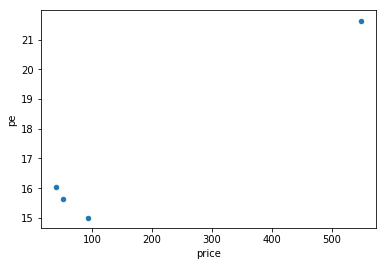

In [71]:
df.plot.scatter(x='price',y='pe')

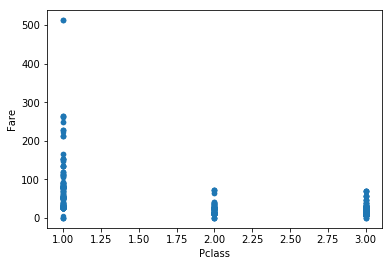

In [72]:
# titanic Pclass 和 票价的关系
titanic.plot.scatter(x='Pclass',y='Fare')

## 6.2 箱式图

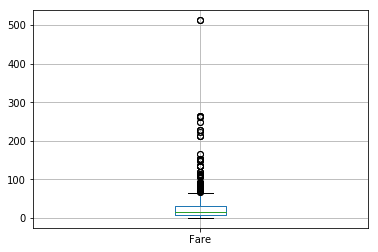

In [73]:
titanic.boxplot('Fare')

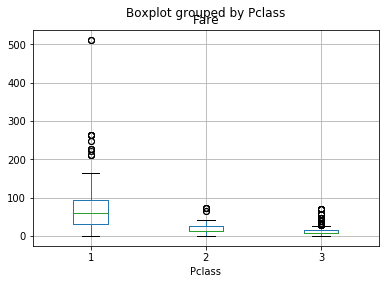

In [103]:
titanic.boxplot('Fare',by='Pclass')

## 6.3 柱状图

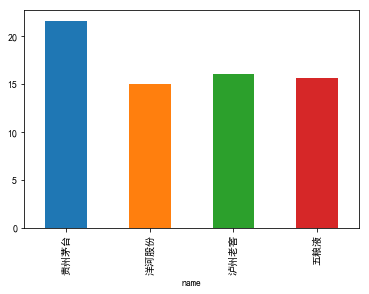

In [74]:
from pylab import mpl 
mpl.rcParams['font.sans-serif'] = ['SimHei']   # 为了支持中文显示
df.set_index('name').pe.plot(kind='bar')

## 6.4 直方图

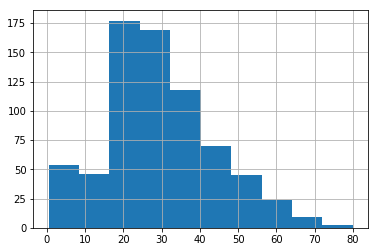

In [153]:
titanic.Age.hist()

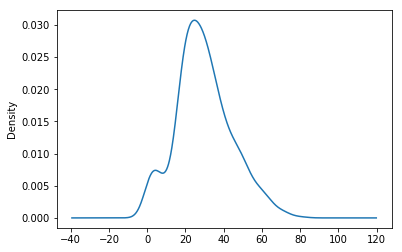

In [154]:
titanic.Age.plot(kind='kde')

>**随堂练习：**查看 Titanic 票价的分布情况

**考查年龄和幸存率之间的关系**

In [135]:
age1 = titanic[titanic.Survived==1].Age
age0 = titanic[titanic.Survived==0].Age

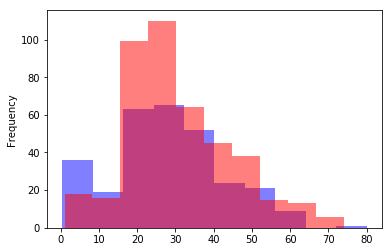

In [165]:
age1.dropna().plot(kind='hist',alpha=0.5,color='blue')
age0.dropna().plot(kind='hist',alpha=0.5,color='red')

>**随堂练习: **画出 kde

# 7. 处理缺失数据

## 7.1 丢弃缺失数据

In [79]:
df = pd.read_csv('stocks.csv',index_col='id',encoding='gbk')
#------------------------------------------------------
df['roe'] = pd.Series([24.93,22.5,17.07],index=['Stock1','Stock2','Stock3'])
df

,name,price,pe,roe
id,,,,
Stock1,贵州茅台,547.92,21.64,24.93
Stock2,洋河股份,93.08,15.01,22.50
Stock3,泸州老窖,40.10,16.04,17.07
Stock4,五粮液,50.75,15.63,NaN


In [45]:
# dropna 默认丢弃含有缺失值的行
df.dropna()

,age,pe,pb,roe
name,,,,
贵州茅台,547.92,21.64,6.97,24.93
洋河股份,93.08,15.01,4.32,22.50
泸州老窖,40.10,16.04,3.63,17.07


In [80]:
# 丢弃含有缺失数据的列
df.dropna(axis=1)

,name,price,pe
id,,,
Stock1,贵州茅台,547.92,21.64
Stock2,洋河股份,93.08,15.01
Stock3,泸州老窖,40.10,16.04
Stock4,五粮液,50.75,15.63


In [81]:
import numpy as np
df['mv'] = pd.Series([7063,1951,1385],index=['贵州茅台','五粮液','洋河股份'])
df['ps'] = np.nan
df

,name,price,pe,roe,mv,ps
id,,,,,,
Stock1,贵州茅台,547.92,21.64,24.93,NaN,NaN
Stock2,洋河股份,93.08,15.01,22.50,NaN,NaN
Stock3,泸州老窖,40.10,16.04,17.07,NaN,NaN
Stock4,五粮液,50.75,15.63,NaN,NaN,NaN


>**随堂练习：** `dropna()` 和 `dropna(axis=1)` 的结果

In [82]:
# 丢弃全为 NaN 的列
df.dropna(axis=1,how='all')

,name,price,pe,roe
id,,,,
Stock1,贵州茅台,547.92,21.64,24.93
Stock2,洋河股份,93.08,15.01,22.50
Stock3,泸州老窖,40.10,16.04,17.07
Stock4,五粮液,50.75,15.63,NaN


## 7.2 填充缺失数据

**如何处理 Titanic 中 Cabin 的缺失数据？**

In [85]:
titanic.Cabin.fillna('N',inplace=True)
titanic.Cabin = [c[0] for c in titanic.Cabin]
titanic.Cabin.value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

# 8. 交叉表

In [95]:
df = pd.read_csv('stock_basic.csv')
df.head()

,Unnamed: 0,ts_code,name,area,industry,market,list_date
0,0,000001.SZ,平安银行,深圳,银行,主板,19910403
1,1,000002.SZ,万科A,深圳,全国地产,主板,19910129
2,2,000004.SZ,国农科技,深圳,生物制药,主板,19910114
3,3,000005.SZ,世纪星源,深圳,房产服务,主板,19901210
4,4,000006.SZ,深振业A,深圳,区域地产,主板,19920427


**想知道每个省市有多少上市公司，并按照 market 分类统计**

In [96]:
pd.crosstab(df.area,df.market)

market,中小板,主板,创业板
area,,,
上海,31,207,46
云南,10,21,2
内蒙,2,20,3
北京,51,166,98
吉林,6,31,4
四川,29,63,28
天津,9,33,8
宁夏,1,12,0
安徽,27,62,14


**统计每一行的和**

In [99]:
pd.crosstab(df.area,df.market,margins=True)

market,中小板,主板,创业板,All
area,,,,
上海,31,207,46,284
云南,10,21,2,33
内蒙,2,20,3,25
北京,51,166,98,315
吉林,6,31,4,41
四川,29,63,28,120
天津,9,33,8,50
宁夏,1,12,0,13
安徽,27,62,14,103


In [103]:
pd.crosstab(df.area,df.market,margins=True,normalize='index')

market,中小板,主板,创业板
area,,,
上海,0.109155,0.728873,0.161972
云南,0.303030,0.636364,0.060606
内蒙,0.080000,0.800000,0.120000
北京,0.161905,0.526984,0.311111
吉林,0.146341,0.756098,0.097561
四川,0.241667,0.525000,0.233333
天津,0.180000,0.660000,0.160000
宁夏,0.076923,0.923077,0.000000
安徽,0.262136,0.601942,0.135922


**考察不同性别的乘客在 Titanic 上的幸存情况**

In [117]:
ct = pd.crosstab(titanic.Sex,titanic.Survived)
ct

Survived,0,1
Sex,,
female,81,233
male,468,109


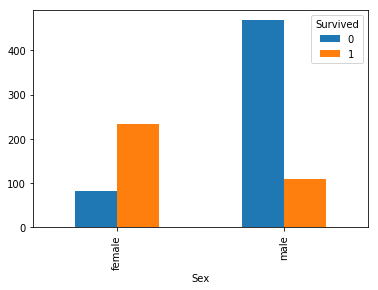

In [118]:
ct.plot(kind='bar')

**考察比率**

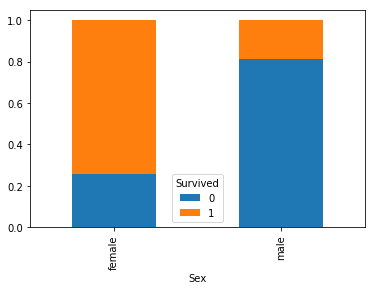

In [126]:
pd.crosstab(titanic.Sex,titanic.Survived,normalize='index').plot(kind='bar',stacked=True)

>**随堂练习: **  
- 画出柱状图，考察 Pclass 和 幸存率之间的关系
- 考察同行人数和幸存率之间的关系